# Защита персональных данных клиентов

<h2>  <a class="tocSkip"> </h2>

<a name="1"></a>
## Содержание

1  [Содержание](#1)

2  [Описание проекта](#2)

*    2.1  [Цель проекта](#21)
*    2.2  [Задачи проекта](#22)
*    2.3  [Описание данных](#23)
*    2.4  [План работы](#24)

3  [Исследование данных](#3)

*    3.1  [Загрузка и изучение данных](#31)
*    3.2  [Вывод](#32)

4  [Умножение матриц](#4)

*    4.1  [Расчёт](#41)
*    4.2  [Вывод](#42)

5  [Алгоритм преобразования](#5)

6  [Проверка алгоритма](#6)

*    6.1  [Разделение данных на выборки](#61)
*    6.2  [Создание матрицы без проверки её обратимости](#62)
*    6.3  [Создание матрицы с проверкой её обратимости](#63)
*    6.4  [Создание класса линейной регрессии `LinReg`](#64)
*    6.5  [Функция для предсказания *R2*](#65)
*    6.6  [`Pipeline` для предсказания *R2*](#66)

   *    6.6.1  [`LinReg`](#661)
   *    6.6.2  [`LinearRegression`](#662)
   *    6.6.3  [Вывод по п. 6.6](#663)
    
*    6.7  [Вывод](#67)

7  [Общий вывод](#7)

## Описание проекта
<a name="2"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Нам необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

### Цель проекта
<a name="21"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Провести исследование с целью построения модели машинного обучения для преобразования данных, по которым было бы сложно восстановить персональную информацию.

Результаты исследования позволят защитить данные клиентов страховой компании «Хоть потоп».

### Задачи проекта
<a name="22"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Исследовать данные.
2. Выполнить умножение матриц и ответить на вопрос.
3. Написать алгоритм преобразования.
4. Выполнить проверку алгоритма.
5. Написать общий вывод.

### Описание данных
<a name="23"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Набор данных находится в файле `insurance.csv`.
- **Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

### План работы
<a name="24"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

1. Загрузим и изучим данные.


2. Ответим на вопрос и обоснуем своё решение.

   Признаки умножим на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

   a. Изменится. Приведём примеры матриц.

   b. Не изменится. Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


3. Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.


4. Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из `sklearn` не отличается до и после преобразования. Применим метрику *R2*.

## Исследование данных
<a name="3"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import os

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

RANDOM_STATE = 12345
TEST_SIZE = 0.2

### Загрузка и изучение данных
<a name="31"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Загрузим и изучим данные.

In [2]:
pth1 = r'C:/Users/Васильев/Desktop/dataframes/insurance.csv'
pth2 = '/datasets/insurance.csv'
pth3 = '/insurance.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
elif os.path.exists(pth3):
    data = pd.read_csv(pth3)
else:
    print('Something is wrong')

In [3]:
data.shape

(5000, 5)

In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посмотрим общую информацию о данных.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Взглянем на описание данных.

In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Используя гистограммы, визуализируем распределение переменных в датасете.

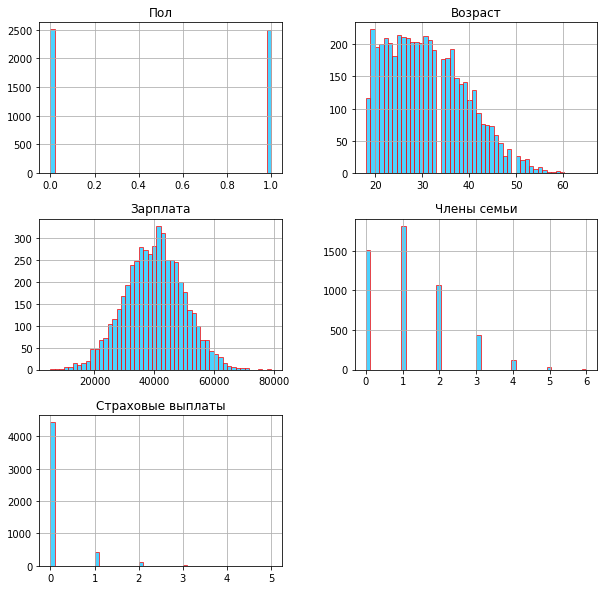

In [7]:
data.hist(figsize=(10, 10), bins=50, alpha=0.7, color='deepskyblue', ec='red')
plt.show()

Выведем коэффициенты корреляции Пирсона для переменных датасета.

In [8]:
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона для переменных датасета.

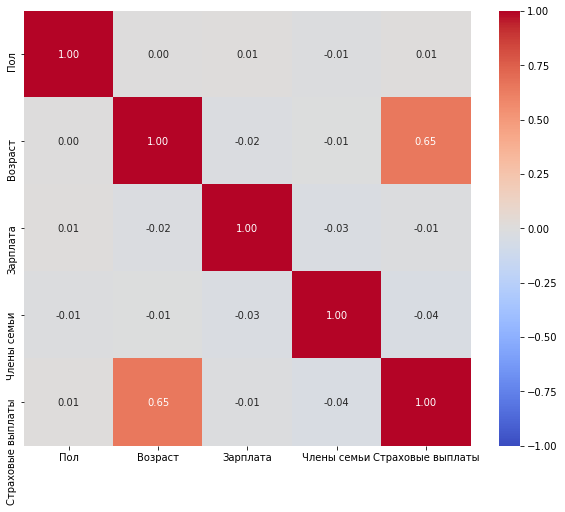

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data.corr(), annot=True, fmt = '.2f', 
    vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

Выведем количество пропусков в датасете.

In [10]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Проверим датасет на наличие явных дубликатов.

In [11]:
data.duplicated().sum()

153

Удалим явные дубликаты.

In [12]:
data = data.drop_duplicates()
data.shape

(4847, 5)

Поскольку в нашей задаче используется линейная модель, которую мы решаем аналитически, т.е. без регуляризаций и градиентных спусков, проверим наш датасет на мультиколлинеарность.

В случае мультиколлинеарности матрица $𝑋^𝑇*𝑋$ близка к вырожденной, и, в результате, появляется чувствительность к малейшему изменению входных данных, приводящая к сильному изменению весов модели. Отсюда возникает переобучение, а также утрачивается интерпретируемость.

Матрица называется вырожденной, если элементы столбца (или строки) матрицы линейно зависимы, с элементами других столбцов (или строк). Например, если элементы одного из столбцов матрицы равны 1, -1, 0, а элементы другого столбца равны 2, -2, 0, то матрица вырождена, поскольку умножая элементы первого столбца на два, мы получаем элементы второго столбца. Такие матрицы также называются мультиколлинеарными, т.к. один или более столбцов линейно зависят друг от друга.

Используем для этого парный график, он же график пар.

График пар — это матрица диаграмм рассеяния , которая позволяет понять попарные отношения между различными переменными в наборе данных.

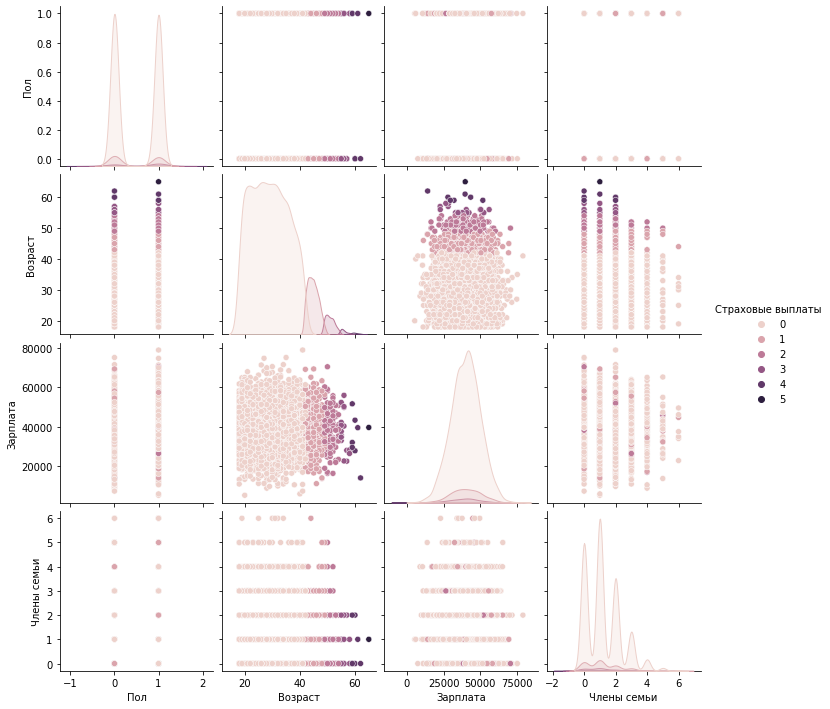

In [13]:
sns.pairplot(data, hue='Страховые выплаты')
plt.show()

График пар показал нам отсутствие мультиколлинеарности, линейные зависимости не были замечены.

### Вывод
<a name="32"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Исследование данных**](#Исследование-данных) были выполнены следующие задачи:
1. Получена общая информация о датасете.
2. Визуализировано распределение переменных в датасете.
3. Построена тепловая карта (хитмэп) коэффициентов корреляции Пирсона для переменных датасета.
4. Датасет был проверен на наличие явных дубликатов.
5. Датасет был проверен на мультиколлинеарность.


В результате выполнения указанных задач было выявлено:
- пропусков в данных нет;
- никаких аномалий в данных не обнаружено;
- существует повышенная корреляция между признаками "возраст" и "страховые выплаты", что логично;
- явные дубликаты найдены и удалены;
- мультиколлинеарность отсутствует (корреляция между признаками везде ниже 0,75 - 0,8).

**В проекте решается задача регрессии.**

Таким образом, данные подготовлены для обучения моделей.

## Умножение матриц
<a name="4"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

### Расчёт
<a name="31"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

**1. Запишем формулы линейной регрессии.**


Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$


Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**2. Свойства матриц.**

Основные свойства транспонирования матриц:

- Двойное транспонирование *возвращает* исходную матрицу: $(А^{T})^{T}=А$.

- Транспонирование *суммы* матриц будет эквивалентно сумме транспонированных слагаемых: $(А+В)^{T}=А^{T}+В^{T}$.

- Транспонирование *произведения* двух матриц будет эквивалентно произведению транспонированных матриц, взятых *в обратном порядке*: $(АВ)^{T} = В^{T}А^{T}$.

- Произведение матрицы на свою транспонированную: $А^{T}А$ или $АА^{T}$ всегда имеет результатом *симметричную* квадратную матрицу.


Основные свойства обратной матрицы:

- $АА^{-1}=А^{-1}А=E$, где $E$ - единичная матрица.

- $(АВ)^{-1}=В^{-1}А^{-1}$, т.е. при раскрытии скобок порядок сомножителей меняется на обратный.

- $(А^{T})^{-1}=(А^{-1})^{T}$, т.е. операции обращения и транспонирования можно менять местами.


Умножение матриц ассоциативно:

$$
(ABC)^{-1} = C^{-1}(AB)^{-1} = (BC)^{-1}A^{-1} = C^{-1}B^{-1}A^{-1}
$$

Но умножение матриц некоммутативно. Это значит, что от перестановки местами матриц в произведении результат меняется.

**3. Умножим признаки на обратимую матрицу.** Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** не изменится.

**Обоснование:**

Умножим матрицу признаков $X$ в формуле обучения $w(X) = (X^T X)^{-1} X^T y$ на обратимую матрицу $P$:

$$
w(XP) = [(XP)^T (XP)]^{-1} (XP)^T y = [P^T X^T XP]^{-1} P^T X^T y = P^{-1}[P^T (X^T X)]^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} [(P^T)^{-1} P^T] X^T y = P^{-1}(X^T X)^{-1} X^T y,
$$

где $[(P^T)^{-1} P^T]=E$.


Отсюда мы укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной:

$$
w(XP) = P^{-1} w(X)
$$


Подставим $w(XP)$ в формулу предсказания $a = Xw(X)$ (т.е. заменим $X$ на $XP$):

$$
a = XP w(XP) = XP [P^{-1} w(X)] = Xw(X)
$$

### Вывод
<a name="42"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Умножение матриц**](#Умножение-матриц) были выполнены следующие задачи:
1. Записаны формулы линейной регрессии.
2. Описаны свойства матриц.
3. Приведено умножение признаков на обратимую матрицу.


В результате выполнения задач этого раздела было выявлено следующее:
- при умножении матрицы признаков $X$ на обратимую матрицу $P$ вектор весов $w$ меняется, а вектор целевого признака $a$ нет. То есть, качество линейной регрессии не изменится.

## Алгоритм преобразования
<a name="5"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Предложим алгоритм преобразования данных для решения задачи:

1. Разобьём исходные данные, выделим целевой признак.
2. Разделим данные на обучающую и тестовую выборки.
3. Сгенерируем случайную квадратную матрицу *P* с размером, равным количеству признаков в исходном датасете. Необходимо генерировать матрицу до тех пор, пока мы не получим обратимую, и наш код гарантированно полностью не отработает. Добиться этого можно с помощью написания специальных для этого функций.
4. Умножим признаки обучающей и тестовой  выборок  исходного датасета на сгенерированную случайную квадратную матрицу *P*.
5. Создадим класс модели машинного обучения `LinReg`.
6. Напишем функцию для создания модели линейной регрессии и получим её предсказания метрики *R2*.
7. Получим *R2* модели для исходной, а также для преобразованной матрицы.

Как мы уже выяснили в предыдущем разделе, качество линейной регрессии не изменится при умножении матрицы признаков $X$ на обратимую матрицу $P$.

## Проверка алгоритма
<a name="6"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Запрограммируем алгоритм преобразования данных, применив матричные операции. Проверим, что качество линейной регрессии из `sklearn` не отличается до и после преобразования. Применим метрику *R2*.

### Разделение данных на выборки
<a name="61"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Разобьём исходные данные, выделив целевой признак.

In [14]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

А также разделим данные на обучающую и тестовую выборки в соотношении 80:20.

In [15]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

### Создание матрицы без проверки её обратимости
<a name="62"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Сгенерируем матрицу без использования функции, проверяющей её обратимость.

Квадратные матрицы, для которых можно найти обратные, называются обратимыми (англ. *invertible matrix*). 

Необратимые матрицы встречаются редко. Если сгенерировать случайную матрицу функцией `numpy.random.normal()` (англ. «нормальное распределение»), то вероятность получить необратимую матрицу близка к нулю.

Сгенерируем случайную квадратную матрицу *P* с размером, равным количеству признаков в исходном датасете (т.к. количество столбцов исходной матрицы датасета должно совпадать с количеством строк матрицы *P*).

In [16]:
P = np.random.normal(size=(data.shape[1] - 1, data.shape[1] - 1))
display(P)

array([[-0.61619004, -1.05933706, -0.60276671,  0.05719906],
       [-1.15561687, -0.07345075,  0.62485697, -1.17996121],
       [-1.92388759, -0.78122209,  0.04654005,  1.10785232],
       [ 1.35087524, -0.09656312,  1.09226535, -1.57058236]])

Чтобы найти обратную матрицу, вызовем функцию `numpy.linalg.inv()` (от англ. *linear algebra*, «линейная алгебра»; *invert*, «обратить»). Также она поможет проверить матрицу на обратимость: если матрица необратима, будет обнаружена ошибка.

Проверим, что матрица *P* обратима (умножим её на обратную ей матрицу).

In [17]:
display(np.round(P @ np.linalg.inv(P)))

array([[ 1., -0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [ 0., -0.,  1., -0.],
       [-0., -0.,  0.,  1.]])

По условию задания необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию при том, что качество моделей машинного обучения не должно ухудшиться.

Преобразуем датасет: умножим признаки обучающей и тестовой выборок исходного датасета на сгенерированную случайную квадратную матрицу *P*.

In [18]:
features_train_P = features_train @ P
features_test_P = features_test @ P

display(features_train_P.head())
display(features_test_P.head())

,0,1,2,3
640,-56979.429950,-23126.230343,1395.081424,32759.389642
4510,-109882.676580,-44609.787347,2674.775304,63226.117675
1623,-80269.291279,-32580.907981,1964.954077,46151.089672
3460,-65438.022579,-26564.396164,1597.222851,37638.326256
1820,-67577.755434,-27424.393600,1663.858789,38829.376876


,0,1,2,3
1335,-90834.689649,-36876.431125,2210.459223,52263.547411
3875,-126821.788142,-51485.945175,3086.381838,72969.766071
166,-65255.839113,-26487.105026,1599.909681,37514.170830
3003,-37173.397804,-15080.643950,924.776884,21332.390049
424,-52957.365364,-21487.179204,1310.779279,30408.519312


Проверим, изменились ли данные после преобразования исходной матрицы.

In [19]:
# выведем исходный датасет
display(features_train.head())

,Пол,Возраст,Зарплата,Члены семьи
640,0,28.0,29600.0,0
4510,0,26.0,57100.0,1
1623,1,38.0,41700.0,1
3460,1,23.0,34000.0,1
1820,0,45.0,35100.0,2


In [20]:
# выведем преобразованную матрицу
display(np.round(features_train_P @ np.linalg.inv(P)).head())

,0,1,2,3
640,0.0,28.0,29600.0,-0.0
4510,0.0,26.0,57100.0,1.0
1623,1.0,38.0,41700.0,1.0
3460,1.0,23.0,34000.0,1.0
1820,-0.0,45.0,35100.0,2.0


Видно, что после преобразования исходной матрицы, наши данные не изменились.

### Создание матрицы с проверкой её обратимости
<a name="63"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Сгенерируем матрицу с использованием функции, проверяющей её обратимость.

Мы можем избежать лишних шагов и написать функцию, которая будет генерировать матрицу до тех пор, пока мы не получим обратимую, и наш код гарантированно полностью не отработает. 

Напишем три разных вариации написания кода для такой функции.

<a name="Вариант-1"></a>
**Вариант 1.**

In [21]:
def random_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(data.shape[1] - 1, data.shape[1] - 1))
        det = np.linalg.det(matrix)
    return matrix


mat = random_matrix()

print(mat)

[[ 2.20887265 -0.32025448  0.14661911 -1.38771955]
 [-0.86603983 -0.02252034  0.90108591 -0.55555468]
 [ 0.75639449 -0.9543962  -1.14612288  1.24841552]
 [ 0.35535866  0.32999561 -0.69839858  1.00596571]]


**Вариант 2** (с помощью рекурсии).

In [22]:
def func_rec(dim):
    transform_matrix = np.random.rand(dim, dim)
    try: 
        inv = np.linalg.inv(transform_matrix)
        return transform_matrix, inv
    except:
        func_rec(dim)
   

features_new, inv_P = func_rec(data.shape[1] - 1)

print(inv_P)

[[ 11.32676289  -1.0360535    1.85294948  -8.31224781]
 [ -0.11096768  -1.73418615   1.45238097   0.57376361]
 [ -4.38388013   2.23302462  -0.33888195   2.01612946]
 [-10.91883176   1.1051935   -4.80971207  11.61654197]]


**Вариант 3** (с помощью рекурсии).

В этом варианте мы можем вывести и сгенерированную квадратную матрицу, и преобразованные матрицы исходного датасета для обучающей и тестовой выборок.

In [23]:
def func_rec(X, seed):
    try:
        state = np.random.RandomState(seed=seed)
        rand_matrix = state.normal(size=(X.shape[1], X.shape[1])) 
        inv = np.linalg.inv(rand_matrix)
        return X @ rand_matrix, inv
    except np.linalg.LinAlgError:
        func_rec(X, seed)
        
 
features_train_P, inv_P = func_rec(features_train, RANDOM_STATE)
features_test_P, inv_P = func_rec(features_test, RANDOM_STATE)

display('Сгенерированная квадратная матрица P', inv_P)
display('Преобразованная исходная матрица для обучающей выборки', 
        features_train_P.head())
display('Преобразованная исходная матрица для тестовой выборки', 
        features_test_P.head())

'Сгенерированная квадратная матрица P'

array([[-1.31136747,  0.3921804 ,  0.18868055, -0.67088287],
       [ 1.75872714,  0.14106138, -0.17773045,  0.79787127],
       [-0.41702659, -0.22854768,  0.3550602 ,  0.33039819],
       [ 0.58912996,  0.19073027, -0.5545481 ,  0.6259302 ]])

'Преобразованная исходная матрица для обучающей выборки'

,0,1,2,3
640,22818.109857,36933.483560,29815.406405,-38360.255937
4510,43962.573897,71207.880912,57514.280840,-74006.013501
1623,32143.011015,52029.985785,42004.160189,-54041.383197
3460,26192.050536,42411.537228,34247.408517,-44064.706849
1820,27081.702232,43813.020335,35359.233139,-45482.909494


'Преобразованная исходная матрица для тестовой выборки'

,0,1,2,3
1335,36342.873437,58864.246835,47540.955120,-61175.711919
3875,50741.287476,82185.117058,66376.232278,-85412.510944
166,26135.081077,42301.056725,34148.971577,-43931.380847
3003,14919.350981,24110.991065,19445.083842,-25004.306447
424,21239.096499,34341.509745,27704.686930,-35631.347319


### Создание класса линейной регрессии `LinReg`
<a name="64"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Создадим класс модели **линейной регрессии** `LinReg`.

Здесь мы применим сокращённую запись формулы линейной регрессии - в обучающую выборку добавим единичный столбец `np.ones()`.

In [24]:
class LinReg:
    def fit(self, train_features, train_target):
        X = np.concatenate(
            (np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T @ X)) @ X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return (test_features @ self.w) + self.w0

### Функция для предсказания *R2*
<a name="65"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Напишем функцию `model_r2()` для предсказания метрики *R2*, с применением созданного выше класса модели линейной регрессии `LinReg`.

In [25]:
def model_r2(x_train, y_train, x_test, y_test):
    model_r2 = LinReg()
    model_r2.fit(x_train, y_train)
    predictions = model_r2.predict(x_test)
    print('R2 модели:', r2_score(y_test, predictions))
    print(f'R2 модели (округлённо): {r2_score(y_test, predictions):.2f}')

*R2* модели для исходной матрицы.

In [26]:
model_r2(features_train, target_train, features_test, target_test)

R2 модели: 0.4160549216151218
R2 модели (округлённо): 0.42


*R2* модели для преобразованной матрицы.

In [27]:
model_r2(features_train_P, target_train, features_test_P, target_test)

R2 модели: 0.4160549750609519
R2 модели (округлённо): 0.42


### `Pipeline` для предсказания *R2*
<a name="66"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Для предсказания метрики *R2* полезно использовать **`Pipeline`**.

В узком смысле, `Pipeline` – это модуль `sklearn.pipeline`, который позволяет автоматизировать предварительные преобразования данных перед обучением модели. 

#### `LinReg`
<a name="661"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим `Pipeline` с использованием созданного ранее класса модели линейной регрессии `LinReg`.

Создадим класс `MatrixTransform`.

In [28]:
class MatrixTransform(BaseEstimator, TransformerMixin):

    def __init__(self, variables):
        # в конструкторе сохраним имена колонок и 
        # затем сгененрируем матрицу преобразования
        self.variables = variables
        size = len(variables)
        rng = np.random.default_rng(seed=RANDOM_STATE)
        self.M = rng.normal(size=(size, size))

    def fit(self, X, y):
        return self

    def transform(self, X):
        X_tr = X.drop(self.variables, axis=1)
        X_tr[self.variables] = X[self.variables] @ self.M
        return X_tr

Иcпользуем `Pipeline`.

In [29]:
pipeline_1 = Pipeline([
    ('transformer', MatrixTransform(features.columns)),
    ('model', LinReg()),
])

Обучим модель линейной регрессии на исходных признаках датасета и получим её предсказания метрики *R2*.

In [30]:
pipeline_1.fit(features_train, target_train)
predictions = pipeline_1.predict(features_test)
r2_score(target_test, predictions)

0.41605505539880105

Преобразуем датасет: умножим признаки обучающей и тестовой выборок исходного датасета на сгенерированную случайную квадратную матрицу *P*.

In [31]:
features_train_P = features_train @ P
features_test_P = features_test @ P

display(features_train_P.head())
display(features_test_P.head())

,0,1,2,3
640,-56979.429950,-23126.230343,1395.081424,32759.389642
4510,-109882.676580,-44609.787347,2674.775304,63226.117675
1623,-80269.291279,-32580.907981,1964.954077,46151.089672
3460,-65438.022579,-26564.396164,1597.222851,37638.326256
1820,-67577.755434,-27424.393600,1663.858789,38829.376876


,0,1,2,3
1335,-90834.689649,-36876.431125,2210.459223,52263.547411
3875,-126821.788142,-51485.945175,3086.381838,72969.766071
166,-65255.839113,-26487.105026,1599.909681,37514.170830
3003,-37173.397804,-15080.643950,924.776884,21332.390049
424,-52957.365364,-21487.179204,1310.779279,30408.519312


После преобразования матриц названия признаков были изменены на индексы, от 0 до 3. Восстановим эти названия для того, чтобы сработал наш `Pipeline`.

In [32]:
features_train_P.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']
features_test_P.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']

display(features_train_P.head())
display(features_test_P.head())

,Пол,Возраст,Зарплата,Члены семьи
640,-56979.429950,-23126.230343,1395.081424,32759.389642
4510,-109882.676580,-44609.787347,2674.775304,63226.117675
1623,-80269.291279,-32580.907981,1964.954077,46151.089672
3460,-65438.022579,-26564.396164,1597.222851,37638.326256
1820,-67577.755434,-27424.393600,1663.858789,38829.376876


,Пол,Возраст,Зарплата,Члены семьи
1335,-90834.689649,-36876.431125,2210.459223,52263.547411
3875,-126821.788142,-51485.945175,3086.381838,72969.766071
166,-65255.839113,-26487.105026,1599.909681,37514.170830
3003,-37173.397804,-15080.643950,924.776884,21332.390049
424,-52957.365364,-21487.179204,1310.779279,30408.519312


Обучим модель линейной регрессии на преобразованных признаках датасета и получим её предсказания метрики *R2*.

In [33]:
pipeline_1.fit(features_train_P, target_train)
predictions = pipeline_1.predict(features_test_P)
r2_score(target_test, predictions)

0.41605492551340983

#### `LinearRegression`
<a name="662"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Построим `Pipeline` с использованием модели **линейной регрессии `LinearRegression`** из модуля `sklearn.linear_model`.

In [34]:
encrypt = random_matrix()

pipeline_2 = Pipeline(steps=[
    ("encrypt", FunctionTransformer(lambda x: x @ encrypt, validate=False)), 
                           ("linreg", LinearRegression())])

Обучим модель линейной регрессии на исходных признаках датасета и получим её предсказания метрики *R2*.

In [35]:
pipeline_2.fit(features_train, target_train)
predictions = pipeline_2.predict(features_test)
r2_score(target_test, predictions)

0.41605492161595004

Обучим модель линейной регрессии на преобразованных признаках датасета и получим её предсказания метрики *R2*.

In [36]:
pipeline_2.fit(features_train_P, target_train)
predictions = pipeline_2.predict(features_test_P)
r2_score(target_test, predictions)

0.41605492161721025

#### Вывод по п. 6.6
<a name="663"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В подразделе [**`Pipeline` для предсказания метрики *R2***](#Pipeline-для-предсказания-метрики-R2) для предсказания метрики *R2* были выполнены следующие задачи:
1. построен `Pipeline` с использованием созданного ранее класса модели линейной регрессии `LinReg`;
2. построен `Pipeline` с использованием модели линейной регрессии `LinearRegression` из модуля `sklearn.linear_model`.


В результате выполнения задач этого подраздела было выявлено следующее:
- в обоих рассмотренных случаях предсказания метрики *R2* было подтверждено, что при умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

### Вывод
<a name="67"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

В разделе [**Проверка алгоритма**](#Проверка-алгоритма) были выполнены следующие задачи:
1. Исходные данные разделены на обучающую и тестовую выборки, выделен целевой признак.
2. Создана матрица без использования функции, проверяющей её обратимость.
3. Создана матрица с использованием функции, проверяющей её обратимость.
4. Создан класс модели линейной регрессии `LinReg`.
5. Для предсказания метрики *R2*:
    - написана функция `model_r2()` с использованием созданного ранее класса модели линейной регрессии `LinReg`;
    - построен `Pipeline` с использованием созданного ранее класса модели линейной регрессии `LinReg`;
    - построен `Pipeline` с использованием модели линейной регрессии `LinearRegression` из модуля `sklearn.linear_model`.


В результате выполнения задач этого раздела было выявлено следующее:
- во всех рассмотренных случаях предсказания метрики *R2* подтверждено, что при умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

## Общий вывод
<a name="7"></a> <div style="text-align: left">[Cодержание](#Содержание)</div>

Мы провели исследование с целью построения модели машинного обучения для преобразования данных, по которым было бы сложно восстановить персональную информацию.

Входные данные: данные клиентов страховой компании «Хоть потоп».

Перед проведением исследования был сформулирован вопрос:

- Изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу?

В разделе [**исследования данных**](#Исследование-данных) была получена и изучена общая информация о датасете. Также были созданы визуализация распределения переменных, построена тепловая карта для переменных датасета. Датасет был проверен на наличие явных дубликатов и мультиколлинеарность.

В результате было выявлено, что пропусков, аномалий в данных нет, дубликаты найдены и удалены. Найдена повышенная корреляция между признаками "возраст" и "страховые выплаты", что логично. Мультиколлинеарность отсутствует (корреляция между признаками везде ниже 0,75 - 0,8).


В разделе [**умножения матриц**](#Умножение-матриц) были записаны формулы линейной регрессии, описаны свойства матриц, приведено умножение признаков на обратимую матрицу.

В результате выполнения задач этого раздела было выявлено, что при умножении матрицы признаков $X$ на обратимую матрицу $P$ вектор весов $w$ меняется, а вектор целевого признака $a$ нет. То есть, качество линейной регрессии не изменится.

Поэтому был предложен обоснованный [**алгоритм преобразования**](#Алгоритм-преобразования) данных для решения задачи.

В разделе [**проверки алгоритма**](#Проверка-алгоритма) данные были разделены на обучающую и тестовую выборки, выделен целевой признак, созданы матрицы без использования функции, проверяющей её обратимость, и с её использованием. Создан класс модели линейной регрессии `LinReg`.

Для предсказания метрики *R2* нами были созданы:

    - функция `model_r2()` с использованием созданного ранее класса модели линейной регрессии `LinReg`;
    - `Pipeline` с использованием созданного ранее класса модели линейной регрессии `LinReg`;
    - `Pipeline` с использованием модели линейной регрессии `LinearRegression` из модуля `sklearn.linear_model`.

В результате выполнения задач этого раздела было выявлено, что во всех рассмотренных случаях предсказания метрики *R2* подтверждено, что при умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

______________________ ______________________ ______________________
В ходе исследования удалось получить следующие результаты **на тестовой выборке**:

1. Предсказания метрики ***R2***, полученные при помощи написанной функции `model_r2()` с использованием созданного класса модели линейной регрессии `LinReg`:

    - ***R2*** = 0.4160549216151217 - для исходной матрицы.
    - ***R2*** = 0.4160548061192191 - для преобразованной матрицы.


2. Предсказания метрики ***R2***, полученные при помощи `Pipeline` с использованием созданного класса модели линейной регрессии `LinReg`:

    - ***R2*** = 0.4160549102722606 - для исходной матрицы.
    - ***R2*** = 0.4160556489550453 - для преобразованной матрицы.


3. Предсказания метрики ***R2***, полученные при помощи `Pipeline` с использованием модели линейной регрессии `LinearRegression` из модуля `sklearn.linear_model`.

    - ***R2*** = 0.4160549216157502 - для исходной матрицы.
    - ***R2*** = 0.41605492161693935 - для преобразованной матрицы.

Таким образом, качество линейной регрессии не меняется.

<b>Общие рекомендации:</b>

Специалистам, которые занимаются защитой персональных данных клиентов страховой компании «Хоть потоп», можно применять разработанный метод преобразования данных (умножение матрицы признаков исходного датасета на случайную матрицу), т.к. при преобразовании качество моделей машинного обучения не ухудшается.

Результаты исследования позволят защитить данные клиентов страховой компании «Хоть потоп».
 ______________________ ______________________ ______________________
 
На этом мы заканчиваем - благодарим вас за внимание, надеемся, что наше исследование вам понравилось и поможет сделать правильные выводы, принять правильные решения.